In [ ]:
from PIL import Image
import cv2
import pytesseract as ocr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [25]:
test_set = {
    "traffic_sign.jpg": "90",
    "traffic_sign_1.jpg": "30",
    "traffic_sign_2.jpg": "30",
    "traffic_sign_3.jpg": "60",
    "traffic_sign_4.jpg": "60",
    "traffic_sign_5.jpg": "30",
    "traffic_sign_6.jpg": "30",
    "traffic_sign_7.jpg": "90",
    "traffic_sign_8.jpg": "90",
    "traffic_sign_9.jpg": "90",
    "traffic_sign_10.jpg": "90",
    "traffic_sign_11.jpg": "90",
    "traffic_sign_12.jpg": "90",
    "traffic_sign_13.jpg": "90",
    "traffic_sign_14.jpg": "90",
    "traffic_sign_15.jpg": "90",
    "traffic_sign_16.jpg": "30",
    "traffic_sign_17.jpg": "30",
    "traffic_sign_18.jpg": "30",
    "traffic_sign_19.jpg": "30",
    "traffic_sign_20.jpg": "30",
    "traffic_sign_21.jpg": "30",
    "traffic_sign_22.jpg": "30",
    "traffic_sign_23.jpg": "30",
    "traffic_sign_24.jpg": "30",
    "traffic_sign_25.jpg": "60",
    "traffic_sign_26.jpg": "60",
    "traffic_sign_27.jpg": "60",
    "traffic_sign_28.jpg": "60",
    "traffic_sign_29.jpg": "60",
    "traffic_sign_30.jpg": "60",
    "traffic_sign_31.jpg": "60",
    "traffic_sign_32.jpg": "60",
    "traffic_sign_33.jpg": "60",
    "traffic_sign_34.jpg": "60",
    "traffic_sign_35.jpg": "stop",
    "traffic_sign_36.jpg": "stop",
    "traffic_sign_37.jpg": "stop",
    "traffic_sign_38.jpg": "stop",
    "traffic_sign_39.jpg": "stop",
    "traffic_sign_40.jpg": "stop",
    "traffic_sign_41.jpg": "stop",
    "traffic_sign_42.jpg": "stop",
    "traffic_sign_43.jpg": "stop",
    "traffic_sign_44.jpg": "stop",
    "traffic_sign_45.jpg": "stop",
    "traffic_sign_46.jpg": "stop",
    "traffic_sign_47.jpg": "stop",
    "traffic_sign_48.jpg": "stop",
    "traffic_sign_49.jpg": "stop",
    "traffic_sign_50.jpg": "stop",
    "traffic_sign_51.jpg": "stop",
    "traffic_sign_52.jpg": "stop",
    "traffic_sign_53.jpg": "stop",
    "traffic_sign_54.jpg": "stop",
    "traffic_sign_55.jpg": "stop",
    "traffic_sign_56.jpg": "stop",
    "traffic_sign_57.jpg": "stop",
    "traffic_sign_58.jpg": "stop",
    "traffic_sign_59.jpg": "stop",
    "traffic_sign_60.jpg": "stop",
    "traffic_sign_61.jpg": "stop",
    "traffic_sign_62.jpg": "stop",
    "traffic_sign_63.jpg": "stop",
    "traffic_sign_64.jpg": "stop",
    "traffic_sign_65.jpg": "stop",
    "traffic_sign_66.jpg": "stop",
    "traffic_sign_67.jpg": "stop",
    "traffic_sign_68.jpg": "stop",
    "traffic_sign_69.jpg": "stop",
    "traffic_sign_70.jpg": "stop",
    "traffic_sign_71.jpg": "stop",
    "traffic_sign_72.jpg": "stop",
    "traffic_sign_73.jpg": "stop",
    "traffic_sign_74.jpg": "stop",
    "traffic_sign_75.jpg": "30",
    "traffic_sign_76.jpg": "30",
    "traffic_sign_77.jpg": "30",
    "traffic_sign_78.jpg": "30",
    "traffic_sign_79.jpg": "30",
    "traffic_sign_80.jpg": "30",
    "traffic_sign_81.jpg": "30",
    "traffic_sign_82.jpg": "30",
    "traffic_sign_83.jpg": "30",
    "traffic_sign_84.jpg": "30",
    "traffic_sign_85.jpg": "30",
    "traffic_sign_86.jpg": "30",
    "traffic_sign_89.jpg": "30",
    "traffic_sign_90.jpg": "30",
    "traffic_sign_91.jpg": "30",
    "traffic_sign_92.jpg": "30",
    "traffic_sign_93.jpg": "30",
    "traffic_sign_94.jpg": "30",
    "traffic_sign_95.jpg": "stop",
    "traffic_sign_96.jpg": "stop",
    "traffic_sign_97.jpg": "stop",
    "traffic_sign_98.jpg": "stop",
    "traffic_sign_99.jpg": "stop",
    "traffic_sign_100.jpg": "stop",
    "traffic_sign_101.jpg": "stop",
    "traffic_sign_102.jpg": "stop",
    "traffic_sign_103.jpg": "stop",
    "traffic_sign_104.jpg": "stop",
}

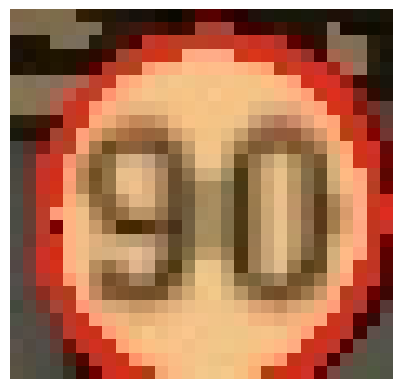

In [2]:
img = cv2.imread("/home/s0203301/project/Data/traffic_signs/traffic_sign.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)

plt.imshow(im_pil)
plt.axis("off")  # optional: hide axes
plt.show()

(28, 29, 3)


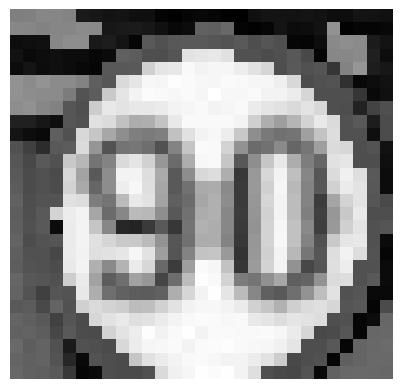

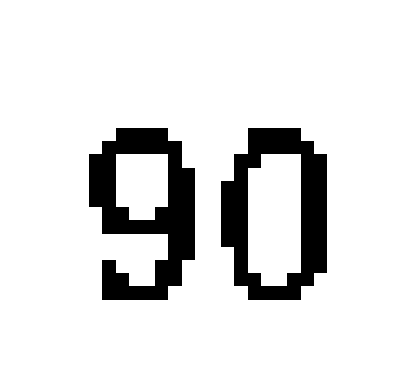

{'level': [1, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1], 'left': [0, 6, 6, 6, 6], 'top': [0, 9, 9, 9, 9], 'width': [29, 18, 18, 18, 18], 'height': [28, 13, 13, 13, 13], 'conf': [-1, -1, -1, -1, 95], 'text': ['', '', '', '', '90']}


In [24]:
image = im_pil
width,height= image.size

image_cv = np.array(image)
print(image_cv.shape)

image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)                                # Grayscale
plt.imshow(image_cv, cmap='gray')
plt.axis("off")  # optional: hide axes
plt.show()

image_cv = cv2.convertScaleAbs(image_cv, alpha=1.5, beta=0)                          # Increase contrast
_, image_cv = cv2.threshold(image_cv, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Binarize (threshold)

# Flood fill from 4 corners
h, w = image_cv.shape
mask = np.zeros((h + 2, w + 2), np.uint8)  # mask for floodFill must be 2 pixels larger than image
corners = [(0,0), (0,h-1), (w-1,0), (w-1,h-1)]
for x, y in corners:
    if image_cv[y, x] == 0:  # Only flood if pixel is black
        cv2.floodFill(image_cv, mask, (x, y), 255)

plt.imshow(image_cv, cmap='gray')
plt.axis("off")  # optional: hide axes
plt.show()

text = ocr.image_to_string(image_cv, config="--psm 6")
print(text)

In [26]:
from typing import Optional

def image_to_sign(image: np.ndarray) -> Optional[str]:
    image_processed = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                                 # Grayscale
    image_processed = cv2.convertScaleAbs(image_processed, alpha=1.5, beta=0)                        # Increase contrast
    _, image_processed = cv2.threshold(image_processed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Binarize (threshold)

    # Flood fill from 4 corners
    h, w = image_processed.shape
    mask = np.zeros((h + 2, w + 2), np.uint8)  # mask for floodFill must be 2 pixels larger than image
    corners = [(0,0), (0,h-1), (w-1,0), (w-1,h-1)]
    for x, y in corners:
        if image_processed[y, x] == 0:  # Only flood if pixel is black
            cv2.floodFill(image_processed, mask, (x, y), 255)

    # Config
    # psm stands for "page segmentation method", the number behind is for the sub-option
    #   0    Orientation and script detection (OSD) only.
    #   1    Automatic page segmentation with OSD.
    #   2    Automatic page segmentation, but no OSD, or OCR.
    #   3    Fully automatic page segmentation, but no OSD. (Default)
    #   4    Assume a single column of text of variable sizes.
    #   5    Assume a single uniform block of vertically aligned text.
    #   6    Assume a single uniform block of text.
    #   7    Treat the image as a single text line.
    #   8    Treat the image as a single word.
    #   9    Treat the image as a single word in a circle.
    #  10    Treat the image as a single character.
    #  11    Sparse text. Find as much text as possible in no particular order.
    #  12    Sparse text with OSD.
    #  13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.
    text: str = ocr.image_to_string(image_cv, config="--psm 6")
    stripped = text.strip().lower()

    # First exact mapping
    exact_match = {"90", "60", "30", "stop"}
    if stripped in exact_match:
        return stripped

    # Loose mapping
    if "9" in text:
        return "90"
    elif "6" in text:
        return "60"
    elif "3" in text:
        return "30"
    if 'stop' in text:
        return "stop"

    return None

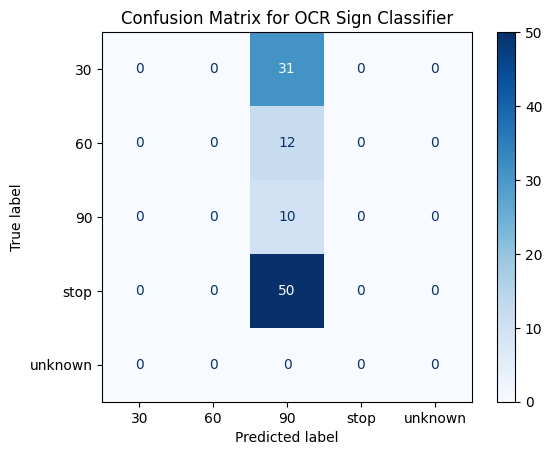

Classification Report:

              precision    recall  f1-score   support

          30       0.00      0.00      0.00        31
          60       0.00      0.00      0.00        12
          90       0.10      1.00      0.18        10
        stop       0.00      0.00      0.00        50
     unknown       0.00      0.00      0.00         0

   micro avg       0.10      0.10      0.10       103
   macro avg       0.02      0.20      0.04       103
weighted avg       0.01      0.10      0.02       103



/home/s0203301/shared/3_8_jupyter/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/s0203301/shared/3_8_jupyter/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/s0203301/shared/3_8_jupyter/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/

In [32]:
# --- Predict ---
y_pred = []
for filename in test_set.keys():
    img = cv2.imread(f"/home/s0203301/project/Data/traffic_signs/{filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img)
    image_cv = np.array(image)
    y_pred.append(image_to_sign(image_cv))

# Replace None with "unknown"
y_pred = [p if p is not None else "unknown" for p in y_pred]
y_true = [t if t is not None else "unknown" for t in test_set.values()]

# --- Compute confusion matrix ---
labels = ["30", "60", "90", "stop", "unknown"]  # include all classes
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for OCR Sign Classifier")
plt.show()

# --- Classification report ---
print("Classification Report:\n")
print(classification_report(y_true, y_pred, labels=labels))